In [ ]:
import os
import requests

# Crear la carpeta 'images' si no existe
os.makedirs("images", exist_ok=True)

# Descargar imágenes en un bucle
for i in range(1, 18):
    im_url = f"https://github.com/YoniChechik/AI_is_Math/raw/master/c_07_camera_calibration/images/{i}.jpeg"
    
    # Realizar solicitud a la URL de la imagen
    response = requests.get(im_url)
    if response.status_code == 200:
        # Guardar la imagen en la carpeta local 'images'
        with open(f"images/{i}.jpeg", "wb") as file:
            file.write(response.content)
        print(f"Imagen {i} descargada exitosamente.")
    else:
        raise Exception(
            f"Error al descargar la imagen {i}. Código de estado: {response.status_code}"
        )


In [10]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
from glob import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
square_size = 2.88
img_mask = "./images/*.jpeg"
pattern_size = (9, 6)

figsize = (20, 20)



In [3]:

img_names = glob(img_mask)
img_names = sorted(glob(img_mask), key=lambda x: int(x.split('/')[-1].split('.')[0]))
num_images = len(img_names)

pattern_points = np.zeros((np.prod(pattern_size), 3), np.float32)
pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= square_size

obj_points = []
img_points = []
h, w = cv2.imread(img_names[0]).shape[:2] # h--> Altura, w-->ancho
img_names


['./images/1.jpeg',
 './images/2.jpeg',
 './images/3.jpeg',
 './images/4.jpeg',
 './images/5.jpeg',
 './images/6.jpeg',
 './images/7.jpeg',
 './images/8.jpeg',
 './images/9.jpeg',
 './images/10.jpeg',
 './images/11.jpeg',
 './images/12.jpeg',
 './images/13.jpeg',
 './images/14.jpeg',
 './images/15.jpeg',
 './images/16.jpeg',
 './images/17.jpeg']

processing ./images/1.jpeg... 
./images/1.jpeg... OK
processing ./images/2.jpeg... 
./images/2.jpeg... OK
processing ./images/3.jpeg... 
./images/3.jpeg... OK
processing ./images/4.jpeg... 
./images/4.jpeg... OK
processing ./images/5.jpeg... 
./images/5.jpeg... OK
processing ./images/6.jpeg... 
./images/6.jpeg... OK
processing ./images/7.jpeg... 
./images/7.jpeg... OK
processing ./images/8.jpeg... 
./images/8.jpeg... OK
processing ./images/9.jpeg... 
./images/9.jpeg... OK
processing ./images/10.jpeg... 
./images/10.jpeg... OK
processing ./images/11.jpeg... 
./images/11.jpeg... OK
processing ./images/12.jpeg... 
./images/12.jpeg... OK
processing ./images/13.jpeg... 
./images/13.jpeg... OK
processing ./images/14.jpeg... 
./images/14.jpeg... OK
processing ./images/15.jpeg... 
./images/15.jpeg... OK
processing ./images/16.jpeg... 
./images/16.jpeg... OK
processing ./images/17.jpeg... 
./images/17.jpeg... OK


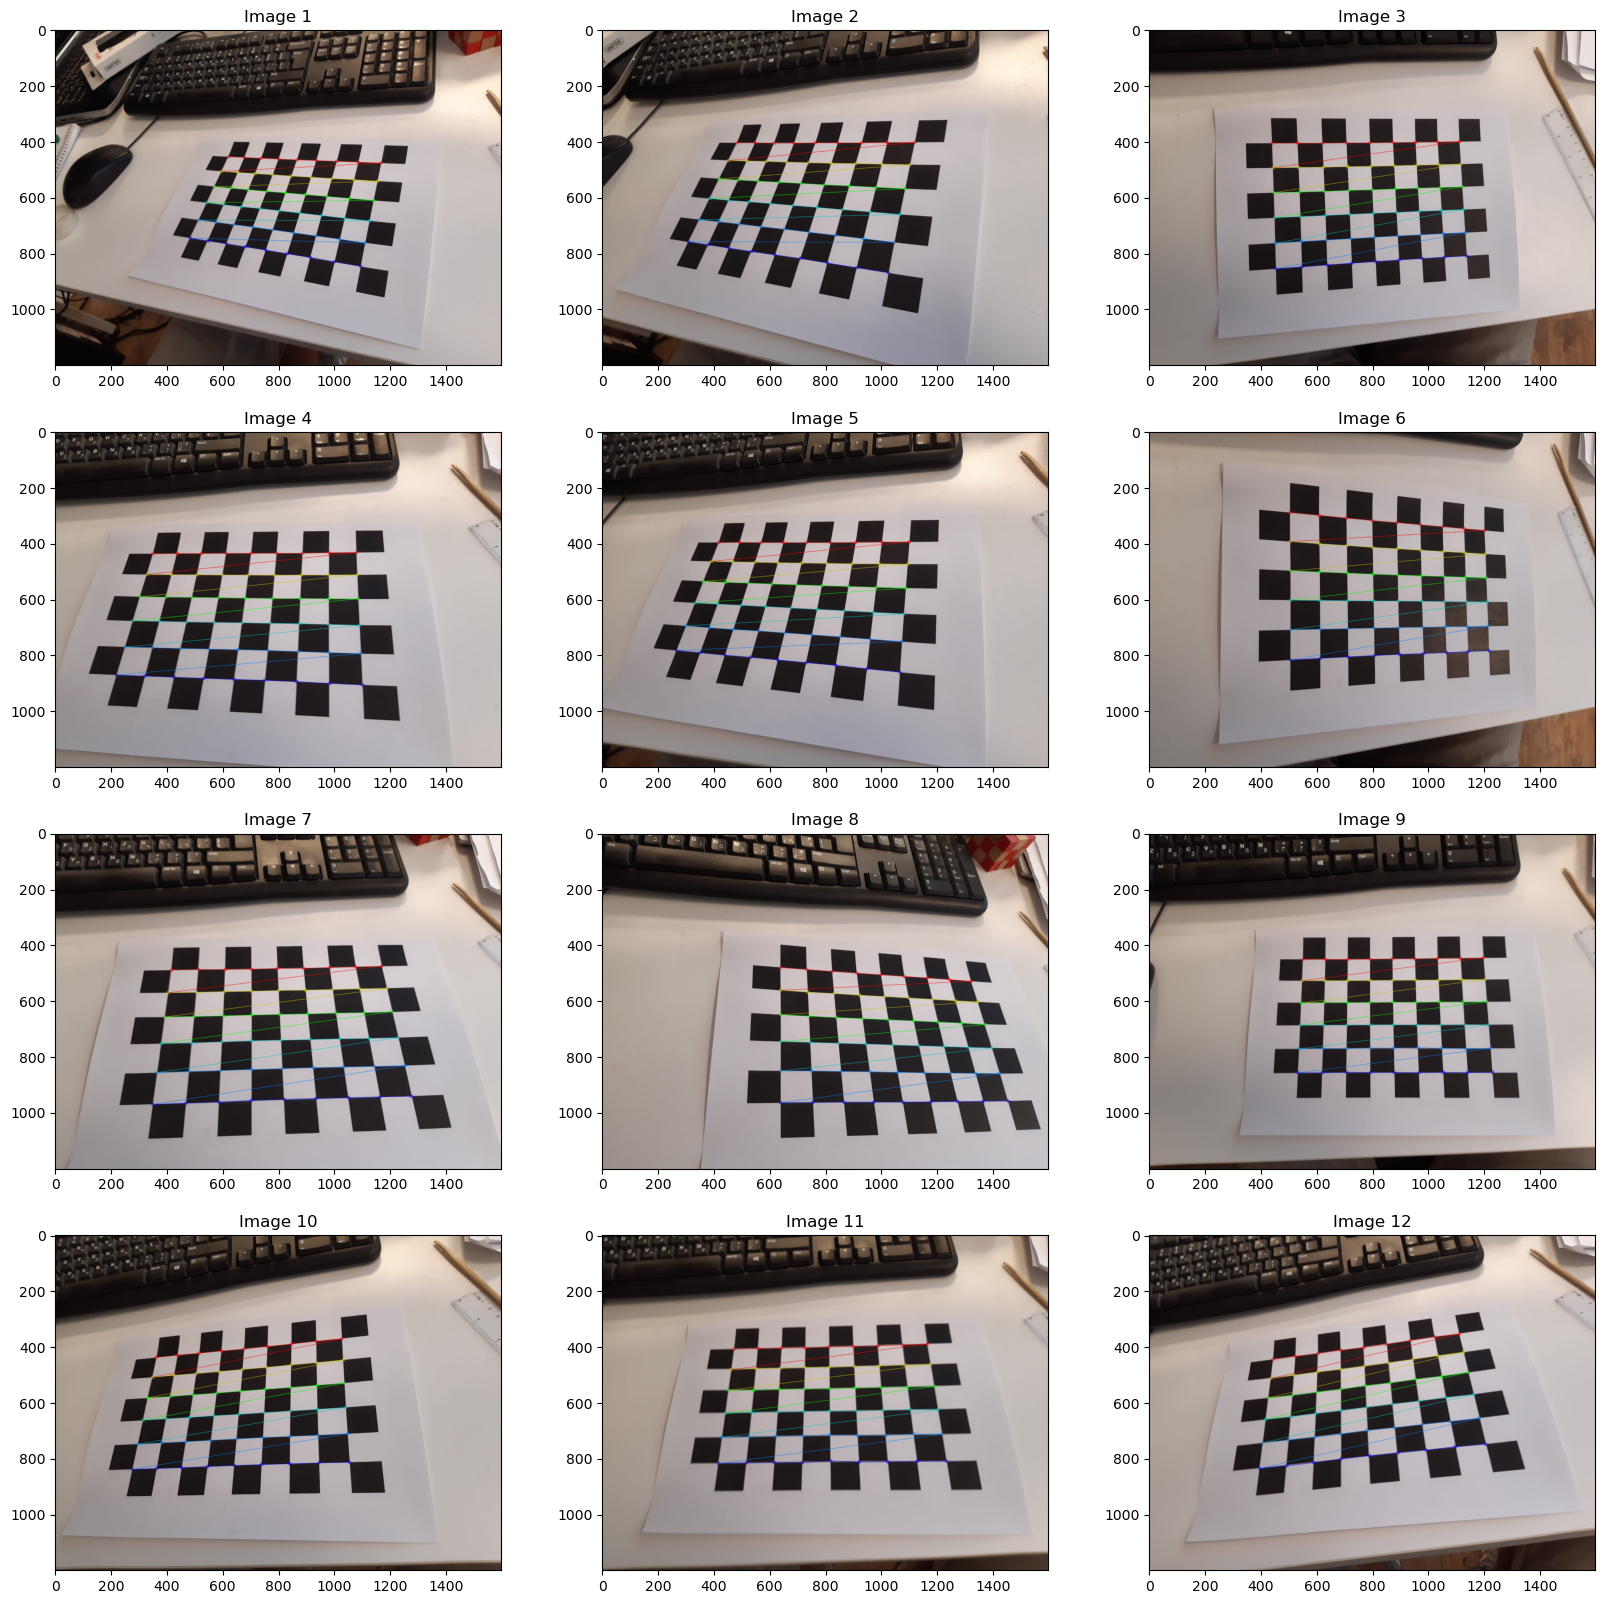

In [4]:
plt.figure(figsize=figsize)

for i, fn in enumerate(img_names):
    print("processing %s... " % fn)
    imgBGR = cv2.imread(fn)

    if imgBGR is None:
        print("Failed to load", fn)
        continue

    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)

    assert (
        w == img.shape[1] and h == img.shape[0]
    ), f"size: {img.shape[1]} x {img.shape[0]}"
    found, corners = cv2.findChessboardCorners(img, pattern_size)
    # # if you want to better improve the accuracy... cv2.findChessboardCorners already uses cv2.cornerSubPix
    # if found:
    #     term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)
    #     cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)

    if not found:
        print("chessboard not found")
        continue

    if i < 12:
        img_w_corners = cv2.drawChessboardCorners(imgRGB, pattern_size, corners, found)
        plt.subplot(4, 3, i + 1)
        plt.imshow(img_w_corners)
        plt.title("Image "+ str(i+1))

    print(f"{fn}... OK")
    img_points.append(corners.reshape(-1, 2))
    obj_points.append(pattern_points)


plt.show()



In [ ]:
# calculate camera distortion
rms, camera_matrix, dist_coefs, _rvecs, _tvecs = cv2.calibrateCamera(
    obj_points, img_points, (w, h), None, None
)

print("\nRMS:", rms)
print("camera matrix:\n", camera_matrix)
print("distortion coefficients: ", dist_coefs.ravel())



RMS: 0.9555761714063952
camera matrix:
 [[1.23514822e+03 0.00000000e+00 7.91299750e+02]
 [0.00000000e+00 1.23711414e+03 6.16947318e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion coefficients:  [ 2.15647744e-01 -8.84108267e-01  1.63343763e-04  1.72003737e-03
  1.10498853e+00]


In [6]:
############## UNDISTORTION #####################################################

img = cv2.imread('images_result/img01.jpeg')
h,  w = img.shape[:2]
newCameraMatrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coefs, (w,h), 1, (w,h))

# Undistort
dst = cv2.undistort(img, camera_matrix, dist_coefs, None, newCameraMatrix)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('images_result/caliResult01.png', dst)

True

In [12]:
# Undistort with Remapping
mapx, mapy = cv2.initUndistortRectifyMap(camera_matrix, dist_coefs, None, newCameraMatrix, (w,h), 5)
dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('images_result/caliResult02.png', dst)

True

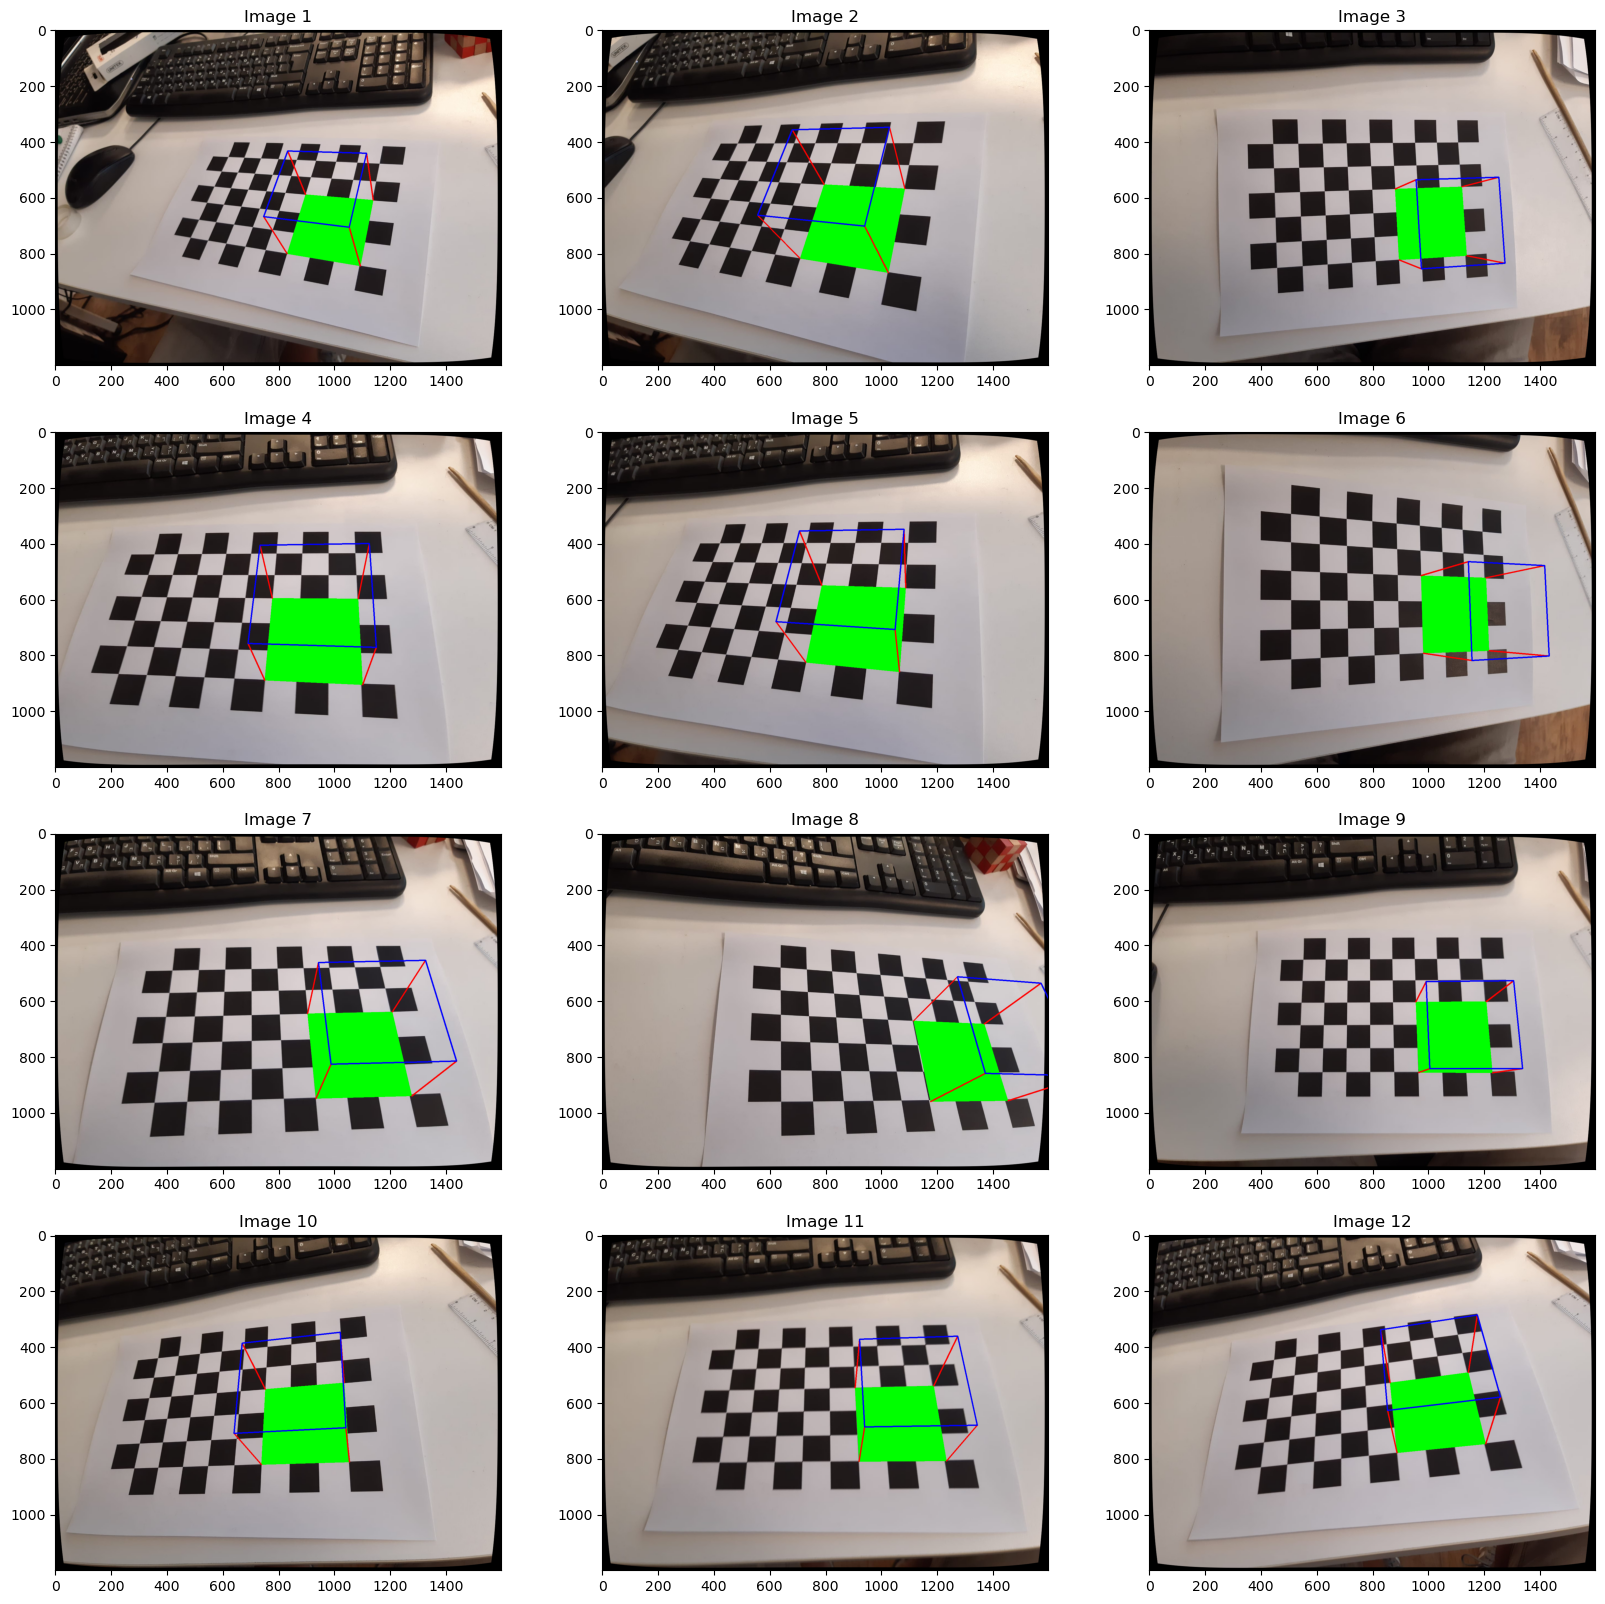

In [13]:
objectPoints = (
    3
    * square_size
    * np.array(
        [
            [0, 0, 0],
            [0, 1, 0],
            [1, 1, 0],
            [1, 0, 0],
            [0, 0, -1],
            [0, 1, -1],
            [1, 1, -1],
            [1, 0, -1],
        ]
    )
)


def draw(img, imgpts):
    imgpts = np.int32(imgpts).reshape(-1, 2)

    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:4]], -1, (0, 255, 0), -1)

    # draw pillars in blue color
    for i, j in zip(range(4), range(4, 8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]), (255), 3)

    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[4:]], -1, (0, 0, 255), 3)

    return img


plt.figure(figsize=figsize)
for i, fn in enumerate(img_names):
    imgBGR = cv2.imread(fn)
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

    dst = cv2.undistort(imgRGB, camera_matrix, dist_coefs)

    imgpts = cv2.projectPoints(
        objectPoints, _rvecs[i], _tvecs[i], camera_matrix, dist_coefs
    )[0]
    drawn_image = draw(dst, imgpts)

    if i < 12:
        plt.subplot(4, 3, i + 1)
        plt.imshow(drawn_image)
        plt.title("Image "+ str(i+1))

plt.show()
